In [2]:
import pandas as pd

In [4]:
df_3 = pd.read_excel('./1. 이커머스 FC주문 데이터/1-2. 이커머스 FC주문 데이터_3월.xlsx')
df_4 = pd.read_excel('./1. 이커머스 FC주문 데이터/1-2. 이커머스 FC주문 데이터_4월.xlsx')
df_5 = pd.read_excel('./1. 이커머스 FC주문 데이터/1-3. 이커머스 FC주문 데이터_5월.xlsx')
df_6 = pd.read_excel('./1. 이커머스 FC주문 데이터/1-4. 이커머스 FC주문 데이터_6월.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: './1. 이커머스 FC주문 데이터/1-4. 이커머스 FC주문 데이터_6월.xlsx'

### 3월 -> 309,352 rows

In [23]:
df_3

,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,...,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,KX007,2021030365922551,KX007210303370934,7,20210303,35510,90001302,22400.0,2,134265392,...,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,...,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,...,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,KX007,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1,3858391637_1,...,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1,4631307460,...,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309347,KX007,2021040163863411,KX007210401807629,7,20210331,235554,90001582,19500.0,1,161523952_5,...,2p,iNEXBatch,20210401,174255,46.0,N,경기도,안산시,부산광역시,북구
309348,KX007,2021040163894031,KX007210401807630,7,20210331,235800,90001582,43600.0,1,4789343708_3,...,2p,iNEXBatch,20210401,174255,49.0,N,경기도,안산시,부산광역시,서구
309349,KX007,1617235699003,KX007210401806392,7,20210331,0,90001502,0.0,1,100034,...,0,BATCH,20210401,173600,21.0,N,경기,광주시,인천광역시,NaN
309350,KX007,1617235754497,KX007210401806393,7,20210331,0,90001502,0.0,1,100032,...,2,BATCH,20210401,173600,16.0,N,경기,광주시,경기도,NaN


### 1. BKG_DATE 일별 물량

In [28]:
spool = df.groupby('BKG_DATE').count()['CORP_ID']
df_col = ['date','logistics']
df_list =[]
for i , j in zip(spool.index.tolist(),spool.tolist()):
    df_list.append([i-20210300,j])
df_result = pd.DataFrame(df_list,columns=df_col)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

sns.barplot(x="date", y="logistics", data=df_result)
plt.show()

In [50]:
df_col = ['date','logistics']
df_list =[]
for i , j in zip(spool.index.tolist(),spool.tolist()):
    df_list.append([i-20210300,j])

In [51]:
df_result = pd.DataFrame(df_list,columns=df_col)

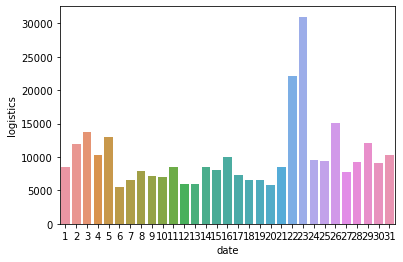

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

sns.barplot(x="date", y="logistics", data=df_result)
plt.show()

### 2. BKG_TYP 주문유형

In [54]:
df['BKG_TYP'].value_counts()

7    309219
8       133
Name: BKG_TYP, dtype: int64

### 3. BKG_TIME 주문시간
+ 처음부터 int로 읽어서.. 귀찮 -> paSS




In [57]:
df['BKG_TIME'].astype(str)

0          35510
1          35521
2          35513
3          35608
4          35551
           ...  
309347    235554
309348    235800
309349         0
309350         0
309351    150451
Name: BKG_TIME, Length: 309352, dtype: object

### 4. SHPR_CD 고객사코드

In [60]:
df['SHPR_CD'].value_counts()

90001302    114237
90001542     48956
90001341     40786
90001541     34220
90001441     31408
90001443     22714
90001521      9252
90001502      3656
90001381      2828
90001562      1109
90001582       186
Name: SHPR_CD, dtype: int64

### 5. INV_AMT 주문금액
+ 추후 고객별.. 센터별 ... 등 .. 음... 활용가능

In [66]:
df.describe()['INV_AMT']

count    3.054140e+05
mean     5.675440e+04
std      6.375390e+04
min      0.000000e+00
25%      1.990000e+04
50%      3.780000e+04
75%      7.160000e+04
max      4.760000e+06
Name: INV_AMT, dtype: float64

### 6. ITEM_SEQ 품목순번

In [68]:
df['ITEM_SEQ'].value_counts()

1     240278
2      40240
3      15938
4       6823
5       2818
6       1439
7        853
8        465
9        178
10        98
11        64
12        38
13        27
14        16
15        13
16         9
17         7
18         6
19         5
20         5
21         4
22         3
23         3
24         3
25         3
29         2
31         2
30         2
27         2
28         2
26         2
32         1
33         1
34         1
35         1
Name: ITEM_SEQ, dtype: int64

### 7. ITEM_CD 품목코드

In [71]:
len(df['ITEM_CD'].value_counts())

6051

In [72]:
df['ITEM_CD'].value_counts()

4658408144_1     10033
5480996007        4926
4586602884_10     3613
4586602884_11     3404
5390871219        2924
                 ...  
4054441775           1
999999_2             1
5235818720           1
5227741926           1
4288443412_1         1
Name: ITEM_CD, Length: 6051, dtype: int64

### 8. ITEM_NM 품목명 없음
### 9. BRAND_NM 브랜드 -> 단일상품..(?)

In [76]:
df['BRAND_NM'].value_counts()

조합형옵션상품    243890
단일상품        57266
추가구성상품        602
Name: BRAND_NM, dtype: int64

In [80]:
df['BRAND_NM'].isnull().sum()

7594

### 10.ITEM_QTY 품목수량

In [83]:
df['ITEM_QTY'].value_counts()

1      266952
2       26088
3        6528
4        3739
5        2015
        ...  
88          1
92          1
860         1
105         1
510         1
Name: ITEM_QTY, Length: 106, dtype: int64

### 11. ITEM_AMT 품목 금액
+ 품목 수량 * 품목금액 = 주문 금액??.. 다른 칼럼도 있던데

In [84]:
df['ITEM_AMT']

0         14900.0
1         20900.0
2         37900.0
3         69800.0
4         39800.0
           ...   
309347    19500.0
309348    43600.0
309349        0.0
309350        0.0
309351        0.0
Name: ITEM_AMT, Length: 309352, dtype: float64

### 수신여부 -> 버리는 카드

In [87]:
df['IF_YN'].value_counts()

N    309352
Name: IF_YN, dtype: int64

### 12. ORDER_CRT_DATETIME 주문 생성시간
+ 주문 생성시간이 비어있는건 뭔소린지..

In [93]:
df['ORDER_CRT_DATETIME'].isnull().sum()

7594

### 13. DLV_DV 택배구분
+ 모두 1

In [96]:
df['DLV_DV'].value_counts()

1.0    309220
Name: DLV_DV, dtype: int64

### 15. DLVPREARRBRANCD 배달예정점소코드
+ 배달가는곳 1986지점

In [108]:
df['DLVPREARRBRANCD'].value_counts()

6850    1424
4706    1246
4787    1222
M58A    1185
7658     962
        ... 
7553       1
N16J       1
7240       1
4163       1
5836       1
Name: DLVPREARRBRANCD, Length: 1986, dtype: int64

### 16. DLVPREARREMPNICKNM 배달예정사원분류코드

In [111]:
df['DLVPREARREMPNICKNM'].value_counts()

A03    959
A04    938
A05    894
A07    879
C05    871
      ... 
M0★      1
O49      1
M48      1
N41      1
U58      1
Name: DLVPREARREMPNICKNM, Length: 2392, dtype: int64

### 17. DLVCLSFCD 배달 터미널 코드
+ 301개

In [114]:
df['DLVCLSFCD'].value_counts()

4A70    3802
4C40    3166
1M27    3093
4A16    2939
3B47    2835
        ... 
WW34      48
WQ02      42
8Z88      23
WW45      14
8Z66       2
Name: DLVCLSFCD, Length: 301, dtype: int64

### 18. DLVSUBCLSFCD 배달터미널 소분류코드
+ 43개??

In [118]:
df['DLVSUBCLSFCD'].value_counts()

1     82408
2     68195
0     58318
3     19628
4     11171
5      8081
0p     5746
1p     5163
2p     5096
1t     3871
1m     3677
1h     3524
2h     3435
0t     2901
2t     2865
2m     2580
3p     2286
6      2260
8      2121
7      2085
0k     2008
3m     1916
3t     1760
2k     1412
2d     1372
9      1340
1d     1327
3k      553
4k      480
5p      360
4m      359
1g      268
4t      249
7k      169
4p       76
5t       65
6t       62
7t       23
4c        4
1a        3
1c        1
0c        1
3c        1
Name: DLVSUBCLSFCD, dtype: int64

### 19. 권역구분

In [122]:
df['POST_ZONE'].value_counts()

10.0    13741
16.0    13373
12.0    10992
14.0    10601
6.0      9909
7.0      9554
18.0     9454
5.0      9181
17.0     9072
31.0     9016
21.0     8748
8.0      8586
4.0      8251
13.0     8069
42.0     7493
22.0     7211
3.0      7138
2.0      6803
51.0     6524
1.0      6336
15.0     6264
11.0     6206
44.0     5853
50.0     5694
28.0     5586
34.0     5529
46.0     5288
41.0     5275
48.0     5203
54.0     5192
47.0     5128
61.0     5005
52.0     4068
37.0     3816
58.0     3698
39.0     3690
27.0     3399
38.0     3214
26.0     3099
35.0     3020
24.0     2934
62.0     2834
30.0     2781
57.0     2758
25.0     2752
32.0     2689
55.0     2604
53.0     2551
36.0     2540
59.0     2520
49.0     2365
63.0     1842
33.0     1054
56.0      893
99.0      464
43.0      365
29.0      328
23.0      290
40.0      256
45.0      121
Name: POST_ZONE, dtype: int64

In [128]:
df['SHPR_ADDR_1'].value_counts()

경기도        290321
세종특별자치시     12524
경기           6485
충청북도           22
Name: SHPR_ADDR_1, dtype: int64

## 주문 시간... 차이?

In [154]:
a = pd.to_datetime(df['BKG_DATE'].astype(str).str[0:4] +  "-"+df['BKG_DATE'].astype(str).str[4:6] + "-" +df['BKG_DATE'].astype(str).str[6:])

In [155]:
b = pd.to_datetime(df['INS_DATE'].astype(str).str[0:4] +  "-"+df['INS_DATE'].astype(str).str[4:6] + "-" +df['INS_DATE'].astype(str).str[6:])

In [131]:
df['INS_DATE']

0         20210303
1         20210303
2         20210303
3         20210303
4         20210303
            ...   
309347    20210401
309348    20210401
309349    20210401
309350    20210401
309351    20210401
Name: INS_DATE, Length: 309352, dtype: int64

In [157]:
(a - b).value_counts()

0 days      252779
-1 days      56191
-2 days        291
-3 days         33
1 days          28
-4 days         12
-8 days          4
-9 days          4
-6 days          3
-5 days          2
-10 days         2
-13 days         1
4 days           1
-11 days         1
dtype: int64

In [2]:
import pandas as pd

In [3]:

#df_5 = pd.read_excel('./1. 이커머스 FC주문 데이터/1-2. 이커머스 FC주문 데이터_4월.xlsx')

In [4]:
df_4

,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,...,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,KX007,2021040170338211,KX007210401803185,7,20210401,44352,90001542,94000.0,1,4658408144_1,...,4m,iNEXBatch,20210401,135628,35.0,N,경기도,광주시,대전광역시,서구
1,KX007,2021040170340561,KX007210401803114,7,20210401,44407,90001341,15900.0,1,2475138283,...,1,iNEXBatch,20210401,135628,44.0,N,경기도,광주시,울산광역시,북구
2,KX007,2021040170347971,KX007210401803156,7,20210401,44419,90001541,31600.0,1,4802177320_1,...,0,iNEXBatch,20210401,135628,4.0,N,경기도,광주시,서울특별시,광진구
3,KX007,2021040170347971,KX007210401803156,7,20210401,44419,90001541,31600.0,2,4802177320_10,...,0,iNEXBatch,20210401,135628,4.0,N,경기도,광주시,서울특별시,광진구
4,KX007,2021040170351281,KX007210401803186,7,20210401,44607,90001542,198000.0,1,5329225766_1,...,0,iNEXBatch,20210401,135628,50.0,N,경기도,광주시,경상남도,함양군
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349583,KX007,2021043084677951,KX007210430292254,7,20210430,92052,90001302,6600.0,1,158150256,...,3,iNEXBatch,20210430,183535,13.0,N,경기도,광주시,경기도,성남시
349584,KX007,2021043084678511,KX007210430292358,7,20210430,92052,90001602,31900.0,1,657383604_1,...,1,iNEXBatch,20210430,183535,1.0,N,경기도,광주시,서울특별시,강북구
349585,KX007,2021042571036031_1,KX007210505360800,7,20210425,122047,90001443,NaN,1,5176594782,...,3t,AK04,20210504,122047,41.0,N,경기,광주시,대구광역시,NaN
349586,KX007,2021042571036031_2,KX007210505360801,7,20210425,122047,90001443,NaN,1,5161924242,...,3t,AK04,20210504,122047,41.0,N,경기,광주시,대구광역시,NaN


In [12]:
df_4['CORP_ID'].value_counts()


KX007    349588
Name: CORP_ID, dtype: int64

FileNotFoundError: [Errno 2] No such file or directory: './1. 이커머스 FC주문 데이터/1-3. 이커머스 FC주문 데이터_6월.xlsx'